In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIdata")

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2018


In [2]:
os.getenv('PUIDATA')

'/nfshome/ml6506/PUIdata'

In [3]:
os.environ['PUI2018'] = '/nfshome/ml6506/PUI2018'

In [4]:
os.getenv('PUI2018')

'/nfshome/ml6506/PUI2018'

# IDEA:
People born after 1980 are more likely to use CITIbike than people born before 1980.

# Null Hypothesis:
People born after 1908 are less likely to use CITIbike than people born before 1980 or same as people born before 1980.

# I will use a significance level  $\alpha=0.05$

which means i want the probability of getting a result at least as significant as mine to be less then 5%

I am starting with a single month of data: reading data from citibikecsv file from Jan 2016

In [5]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata..zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                    ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")
    else:
        print ("file in place, you can continue")

In [6]:
datestring = '201601'
getCitiBikeCSV(datestring)

file in place, you can continue


In [7]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12


In [8]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [9]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)

In [10]:
df.head()

,birth year,date
0,1958.0,2016-01-01 00:00:41
1,1969.0,2016-01-01 00:00:45
2,1982.0,2016-01-01 00:00:48
3,1961.0,2016-01-01 00:01:06
4,1952.0,2016-01-01 00:01:12


In [11]:
df[df['birth year']<1980]

,birth year,date
0,1958.0,2016-01-01 00:00:41
1,1969.0,2016-01-01 00:00:45
3,1961.0,2016-01-01 00:01:06
4,1952.0,2016-01-01 00:01:12
6,1963.0,2016-01-01 00:01:27
8,1963.0,2016-01-01 00:03:12
9,1971.0,2016-01-01 00:03:43
10,1970.0,2016-01-01 00:04:43
12,1964.0,2016-01-01 00:05:41
13,1976.0,2016-01-01 00:06:35


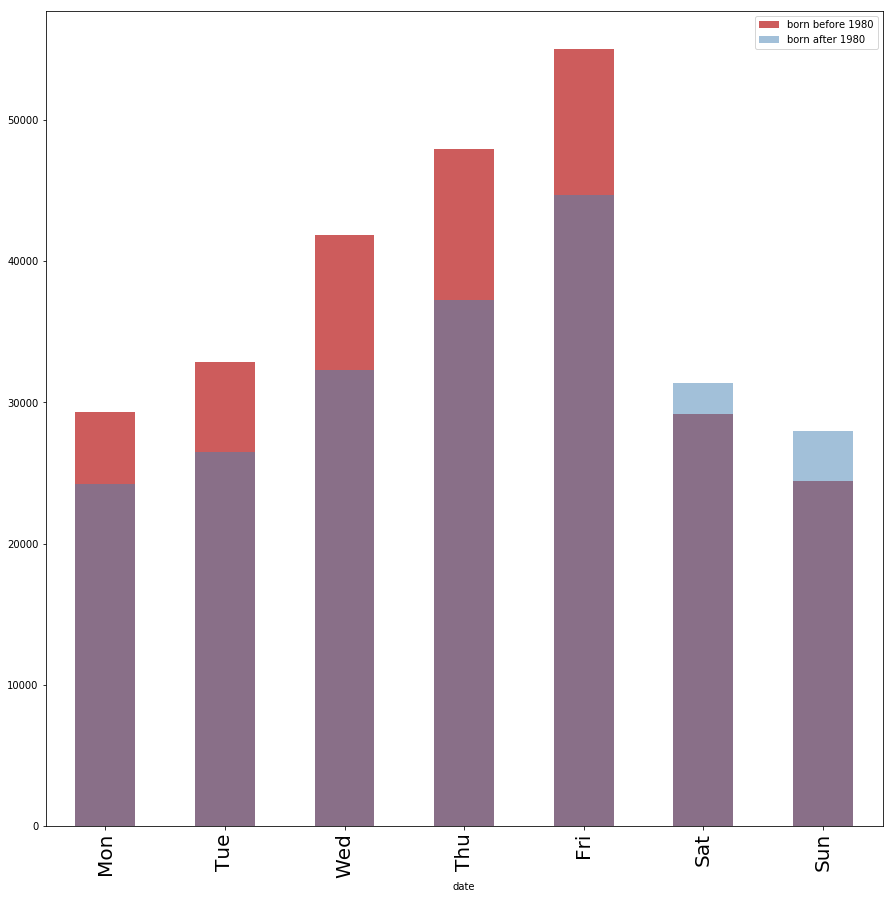

In [12]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
# if 'birth year' < 1980.0 :
#    by==1
# else:
#    by==2

((df['date'][df['birth year']<1980].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='born before 1980')

norm_m = 1
ax = ((df['date'][df['birth year']>=1980].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='born after 1980')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

Figure 1a: Distribution of Citibike bikers by birth year in January 2016, absolute counts

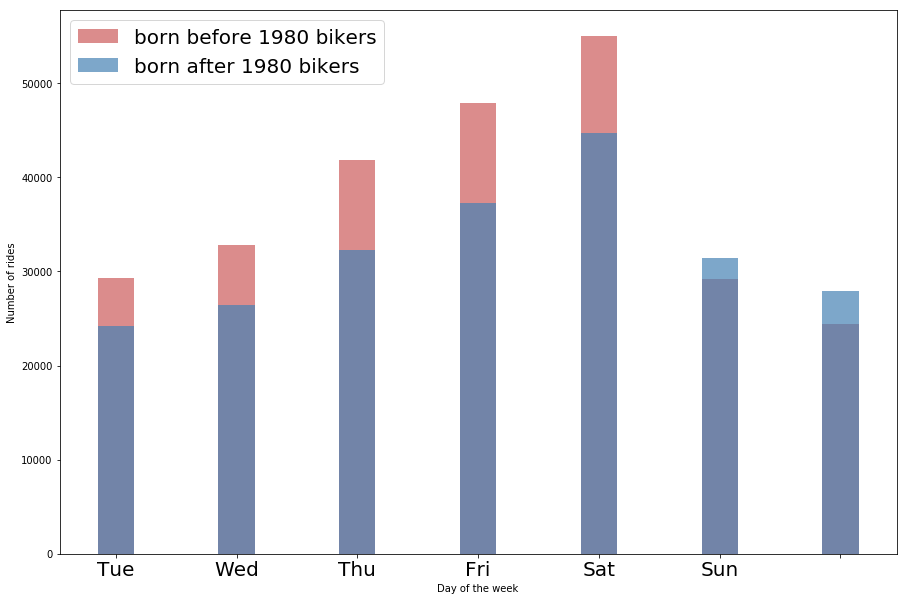

In [14]:
fig,ax=plt.subplots(figsize=(15,10))

counts_w = df[df['birth year']<1980].groupby([df.date.dt.weekday]).count()['date']
norm_w = 1
error_w = np.sqrt(counts_w)
#ax.plot(counts_w, kind="bar",color='IndianRed', label='born before 1980 bikers')
p1 = plt.bar(range(len(counts_w)), counts_w, 0.3, color='IndianRed', label='born before 1980 bikers', alpha = 0.7)

counts_m = df.date[df['birth year'] >= 1980].groupby([df.date.dt.weekday]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
p2 = plt.bar(range(len(counts_m)), counts_m, 0.3, color='SteelBlue', label='born after 1980 bikers', alpha = 0.7)

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(handles = [p1, p2],fontsize=20)
#pl.legend(['born before 1980 bikers','born after 1980 bikers'],fontsize=20)

Figure 1b: Distribution of Citibike bikers by birth year in January 2015, absolute counts, with statistical errors

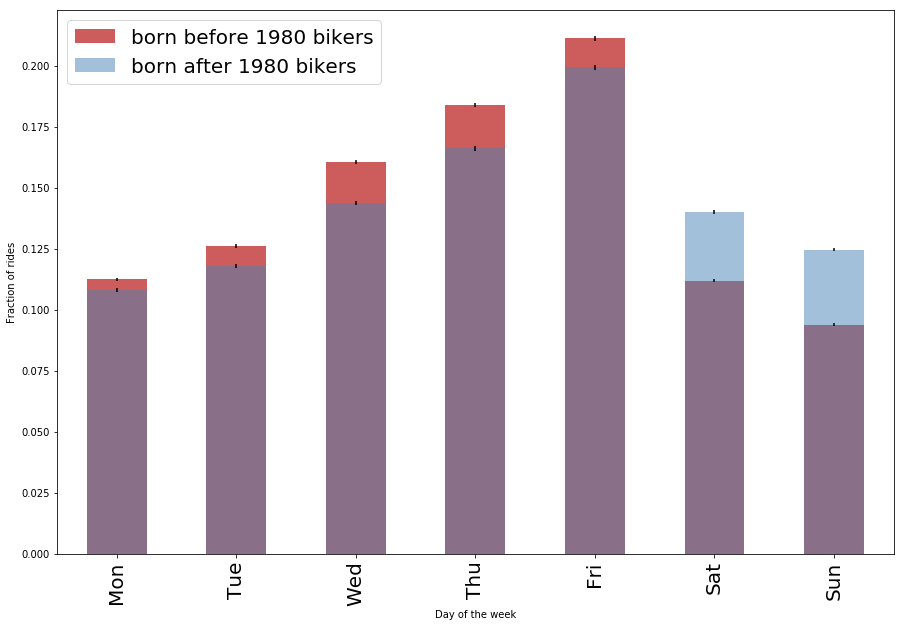

In [15]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='born before 1980 bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='born after 1980 bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['born before 1980 bikers','born after 1980 bikers'],fontsize=20)

Figure 2: Distribution of Citibike bikers by gender in January 2015, normalized